In [1]:
from bs4 import BeautifulSoup
import requests

In [2]:
import pandas as pd

from pandas import Series,DataFrame

In [3]:
#set the link as an object (url)
url = 'http://www.ucop.edu/operating-budget/budgets-and-reports/legislative-reports/2013-14-legislative-session.html'

In [4]:
#request content from web page, using .get() method

result = requests.get(url)
c =  result.content

# set as beautiful soup object
soup = BeautifulSoup(c)

/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [5]:
# Go to the section of interest
#'soup' is a Beautiful Soup object defined above
#.find() is a method
summary = soup.find("div",{'class':'list-land','id':'content'})

# Find the tables in the HTML using the .find_all() method
#pass the filter 'table' in the .find_all() method
tables = summary.find_all('table')

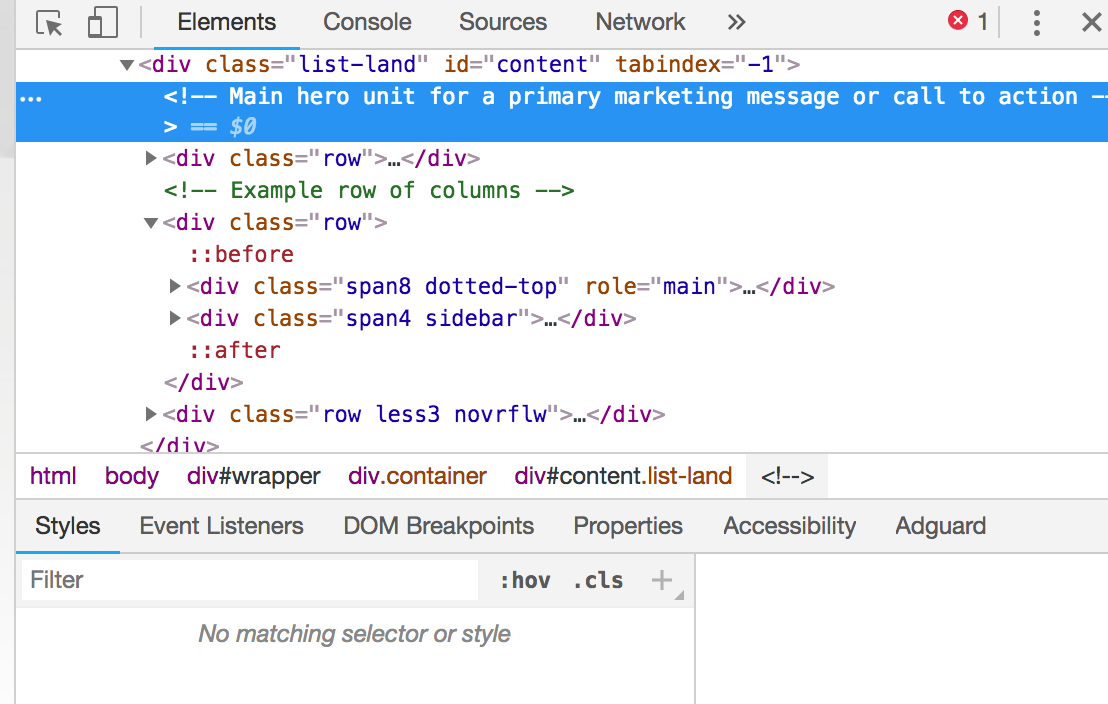

In [28]:
#look at the code and compare to the screenshot
#("div",{'class':'list-land','id':'content'})
from IPython.display import Image

Image('html_inspection.png')

#We'll parse through our tables object and try to find each cell using the findALL('td') method.

#There are tons of options to use with findALL in beautiful soup. You can read about them here.

In [7]:
# Set up empty data list
data = []

In [ ]:
#Now we need to use Beautiful Soup to find the table entries. 
#A 'td' tag defines a standard cell in an HTML table. 
#The 'tr' tag defines a row in an HTML table.

In [13]:
# Set rows as first indexed object in tables with a row
rows = tables[0].findAll('tr')

# now grab every HTML cell in every row

#for every table row (tr) in rows
for tr in rows:
    cols = tr.findAll('td')
    
    #for every cell (td) in the cols (column) object
    # Check to see if text is in the row
    for td in cols:
        text = td.find(text=True) 
        print (text)
        #append the new found text to the intial empty 'data' list
        data.append(text)

1
08/01/13
2013-14 (EDU 92495) Proposed Capital Outlay Projects (2013-14 only) (pdf)
2
09/01/13
2014-15  (EDU 92495) Proposed Capital Outlay Projects (pdf)
3
11/01/13
Utilization of Classroom and Teaching Laboratories (pdf)
4
11/01/13
Instruction and Research Space Summary & Analysis (pdf)
5
11/15/13
Statewide Energy Partnership Program (pdf)
6
11/30/13
2013-23 Capital Financial Plan (pdf)
7
11/30/13
Projects Savings Funded from Capital Outlay Bond Funds (pdf)
8
12/01/13
Streamlined Capital Projects Funded from Capital (pdf)
9
01/01/14
Annual General Obligation Bonds Accountability (pdf)
10
01/01/14
Small Business Utilization (pdf)
11
01/01/14
Institutional Financial Aid Programs - Preliminary report (pdf)
12
01/10/14
Summer Enrollment (pdf)
13
01/15/14
Contracting Out for Services at Newly Developed Facilities (pdf)
14
03/01/14
Performance Measures (pdf)
15
03/01/14
Entry Level Writing Requirement (pdf)
16
03/31/14
Annual Report on Student Financial Support (pdf)
17
04/01/14
Unique St

In [14]:
data

['1',
 '08/01/13',
 '2013-14 (EDU 92495) Proposed Capital Outlay Projects (2013-14 only) (pdf)',
 '2',
 '09/01/13',
 '2014-15\xa0 (EDU 92495) Proposed Capital Outlay Projects (pdf)',
 '3',
 '11/01/13',
 'Utilization of Classroom and Teaching Laboratories (pdf)',
 '4',
 '11/01/13',
 'Instruction and Research Space Summary & Analysis (pdf)',
 '5',
 '11/15/13',
 'Statewide Energy Partnership Program (pdf)',
 '6',
 '11/30/13',
 '2013-23 Capital Financial Plan (pdf)',
 '7',
 '11/30/13',
 'Projects Savings Funded from Capital Outlay Bond Funds (pdf)',
 '8',
 '12/01/13',
 'Streamlined Capital Projects Funded from Capital (pdf)',
 '9',
 '01/01/14',
 'Annual General Obligation Bonds Accountability (pdf)',
 '10',
 '01/01/14',
 'Small Business Utilization (pdf)',
 '11',
 '01/01/14',
 'Institutional Financial Aid Programs - Preliminary report (pdf)',
 '12',
 '01/10/14',
 'Summer Enrollment (pdf)',
 '13',
 '01/15/14',
 'Contracting Out for Services at Newly Developed Facilities (pdf)',
 '14',
 '03/

In [17]:
# Set up empty lists
reports = []
date = []

# Set the 'index' counting object (counter)
index = 0

# Go find the pdf cells
for item in data:
    if 'pdf' in item:
        # Add the date and reports
        date.append(data[index-1])
        
        # Get rid of \xa0
        reports.append(item.replace(u'\xa0', u' '))
                    
    index += 1

In [18]:
#conver each list of 'date' and 'reports' into series
date = Series(date)
reports = Series(reports)

In [22]:
#concatenate those two series into a DataFrame
#axis 1 = y axis
legislative_df = pd.concat([date,reports],axis=1)

In [23]:
#set up the columns' names
legislative_df.columns = ['Date','Reports']

In [24]:
# Show the finished DataFrame
legislative_df

,Date,Reports
0,08/01/13,2013-14 (EDU 92495) Proposed Capital Outlay Pr...
1,09/01/13,2014-15 (EDU 92495) Proposed Capital Outlay P...
2,11/01/13,Utilization of Classroom and Teaching Laborato...
3,11/01/13,Instruction and Research Space Summary & Analy...
4,11/15/13,Statewide Energy Partnership Program (pdf)
5,11/30/13,2013-23 Capital Financial Plan (pdf)
6,11/30/13,Projects Savings Funded from Capital Outlay Bo...
7,12/01/13,Streamlined Capital Projects Funded from Capit...
8,01/01/14,Annual General Obligation Bonds Accountability...
9,01/01/14,Small Business Utilization (pdf)


In [ ]:
#Check out these two companies:

# https://import.io/

# https://www.kimonolabs.com/